## Recursive Feature Elimination

En este notebook probaremos a utilizar el método de scikit-learn Recursive Feature Elimination para la selección de variables.

El método RFE se considera un método backwards porque empieza con el conjunto total de variables y va eliminando en cada iteración la(s) variable(s) que considera menos relevante(s) hasta que se queda con el número de variables deseado. Un método forward operaría en el sentido inverso, empezaría por una o pocas variables y en cada iteración iría añadiendo la(s) variable(s) que considerase más relevante(s).

Importamos Pandas con el alias pd

In [1]:
import pandas as pd

In [2]:
#from yellowbrick.model_selection import RFECV

Cargamos el breast cancer dataset

In [3]:
df = pd.read_csv('breast-cancer.csv')

Transformamos la variale diagnosis, que será nuestra variable objetivo, de forma que valga 0 para casos benignos y 1 para casos malignos

In [4]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

Eliminamos la variable 'id'

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Creamos un dataframe de variables predictoras X y un pandas series para la variable objetivo y

In [7]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Creamos conjunto de test y conjunto de entrenamiento

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

Importamos Pipeline y StandardScaler para crear un pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Importamos RFE para realizar una selección de variables dentro del pipeline

In [11]:
from sklearn.feature_selection import RFE

Necesitamos importar un modelo que tenga atributo coeff_ o feature_importances_ para utilizarlo como estimator dentro de RFE

In [12]:
from sklearn.linear_model import LogisticRegression

Declaramos un objeto estimator

In [13]:
estimator = LogisticRegression()

Declaramos el pipeline. El primer paso será el StandardScaler, el segundo la selección de variables usando RFE. El último paso es el modelo que queramos emplear.

Al declarar el método RFE necesitamos decir qué estimator va a utilizar y cuál será el número final de variables seleccionadas

In [14]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('selector', RFE(estimator, n_features_to_select=18)),
                     ('model', LogisticRegression())])

Entrenamos el pipeline sobre el conjunto de entrenamiento

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 RFE(estimator=LogisticRegression(), n_features_to_select=18)),
                ('model', LogisticRegression())])

Extraemos la máscara que nos dice qué variables han sido seleccionadas y cuáles eliminadas

In [16]:
pipeline.named_steps['selector'].support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

Utilizando la máscara, vemos los nombres de las variables seleccionadas

In [17]:
X.columns[pipeline.named_steps['selector'].support_]

Index(['radius_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')

Predecimos los valores del conjunto de test usando el pipeline

In [18]:
y_pred = pipeline.predict(X_test)

Calculamos la accuracy del pipeline

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

0.9707602339181286

## Recursive Feature Elimination Cross Validation

Exploramos ahora una función de scikit-learn que nos permite comprobar la métrica del modelo predictivo para diferentes valores del número final de variables seleccionadas mediante cross validation.

De esta forma, podemos seleccionar el número de variables para el que se obtiene mejor métrica en los conjuntos de validación.

**Inconveniente**: Necesitamos que el estimator que introduzcamos en RFECV tenga atributos coef_ o feature_importances_, por lo que no podremos utilizar un pipeline previo para, por ejemplo, estandarizar los datos. Esto nos puede dar algunos problemas de convergencia del modelo, por ejemplo si usamos LogisticRegression, ya que la regresión logística converge bien cuando todas las variables están en la misma escala. Puede ser interesante escribir una función personalizada que haga esto, para poder salvar este tipo de inconvenientes.

Importamos el método RFECV

In [11]:
from sklearn.feature_selection import RFECV

Declaramos un objeto selectorcv. Vemos que hemos puesto el argumento max_iter de LogisticRegression igual a 2000. Es un valor muy alto, el valor por defecto es 100. Aun así, veremos que hay problemas de convergencia al entrenar.

In [12]:
selectorcv = RFECV(LogisticRegression(max_iter=2000), cv=3)

In [13]:
selectorcv.fit(X_train, y_train)

/home/jorge/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jorge/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

RFECV(cv=3, estimator=LogisticRegression(max_iter=2000))

Podemos ver la máscara de selección de variables para el caso más óptimo obtenido en la Cross Validation

In [14]:
selectorcv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

Y calcular la cantidad de variables que se ha seleccionado

In [15]:
selectorcv.support_.sum()

29

Para conocer el nombre de las variables seleccionadas, podemos aplicar la máscara al vector de columnas de los datos

In [16]:
X.columns[selectorcv.support_]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

Obtenemos el ranking de cada variable. Todas las variables seleccionadas tendrán un 1. La variable no seleccionada más importante tendrá un 2, la segunda más importante de entre las no seleccionadas tendrá un 3 y así sucesivamente

In [17]:
selectorcv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1])

Obtenemos los resultados de la Cross Validation para todos los casos analizados.

In [18]:
selectorcv.cv_results_

{'mean_test_score': array([0.79644186, 0.80899218, 0.87425002, 0.87675628, 0.90694539,
        0.90694539, 0.90947065, 0.91698944, 0.93459026, 0.94972279,
        0.94972279, 0.94972279, 0.94972279, 0.94972279, 0.94721653,
        0.95222906, 0.94972279, 0.94972279, 0.95224804, 0.95224804,
        0.95224804, 0.95224804, 0.94972279, 0.94972279, 0.94721653,
        0.95226703, 0.95226703, 0.95226703, 0.9547733 , 0.9547733 ]),
 'std_test_score': array([0.03856172, 0.03974497, 0.04046528, 0.03809445, 0.02600234,
        0.02600234, 0.02254782, 0.02853906, 0.02358821, 0.00954101,
        0.00954101, 0.00954101, 0.00954101, 0.00954101, 0.0107422 ,
        0.01783035, 0.01981253, 0.01981253, 0.0187916 , 0.0187916 ,
        0.0187916 , 0.0187916 , 0.01981253, 0.01981253, 0.01631403,
        0.01543201, 0.01543201, 0.01543201, 0.01841792, 0.01841792]),
 'split0_test_score': array([0.7593985 , 0.77443609, 0.92481203, 0.91729323, 0.91729323,
        0.91729323, 0.91729323, 0.94736842, 0.94736842

Extraemos las accuracies y la desviacón típica de las accuracies para cada uno de los números de variables analizados

In [20]:
accuracies = selectorcv.cv_results_['mean_test_score']
deviations = selectorcv.cv_results_['std_test_score']
n_features = list(range(1,len(X.columns)+1))

Importamos matplotlib.pyplot

In [21]:
import matplotlib.pyplot as plt

Representamos el gráfico con los resultados donde, para cada número de variables seleccionadas, representamos la accuracy obtenida más una región sombreada que da idea de la desviación típica de la accuracy para cada caso.

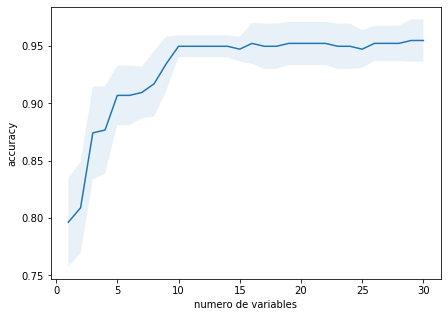

In [23]:
plt.figure(figsize=(7,5))
plt.plot(n_features, accuracies)
plt.fill_between(n_features, 
                 accuracies-deviations,
                 accuracies+deviations,
                 alpha=.1)
plt.ylabel('accuracy')
plt.xlabel('numero de variables')
plt.show()

Una vez visto que el mejor número de variables es 29, podemos entrenar un RFE con ese número de variables finales sobre todo el conjunto de train para obtener la accuracy sobre el conjunto de test

In [32]:
selector = RFE(LogisticRegression(max_iter=2000), n_features_to_select=29, step=1)
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)

Importamos la función accuracy_score

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.9415204678362573

La accuracy sobre el conjunto de test para 29 variables finales es del 94.15%. La media para los conjuntos de validación era del 95.48%, con una desviación típica de 1.84%. Hay una pequeña discrepancia pero en principio no sospechamos que haya overfitting.